In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
FILEPATH = "hate_crime.csv"

df = pd.read_csv(FILEPATH, low_memory=False)
df

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201398,466130,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
201399,466159,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Simple Assault,1.0,School/College,Anti-Black or African American,Individual,S,S
201400,508677,2018,WV0540200,Vienna,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,Unknown,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S
201401,463503,2018,WVWSP2400,State Police:,Madison,State Police,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Intimidation,2.0,Residence/Home,Anti-White,Law Enforcement Officer,S,S


In [33]:
df.drop(columns=['ORI'], inplace=True)
df.drop(columns=['STATE_ABBR'], inplace=True)
df.drop(columns=['INCIDENT_ID'], inplace=True)
df.drop(columns=['POPULATION_GROUP_CODE'], inplace=True)
df.drop(columns=['POPULATION_GROUP_DESC'], inplace=True)
df.drop(columns=['ADULT_VICTIM_COUNT'], inplace=True)
df.drop(columns=['JUVENILE_VICTIM_COUNT'], inplace=True)

In [34]:
df.tail()

,DATA_YEAR,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_NAME,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
201398,2018,Parkersburg,NaN,City,West Virginia,South Atlantic,South,14-DEC-18,0,NaN,...,Unknown,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
201399,2018,Parkersburg,NaN,City,West Virginia,South Atlantic,South,14-NOV-18,1,0.0,...,White,Unknown,1,Simple Assault,1.0,School/College,Anti-Black or African American,Individual,S,S
201400,2018,Vienna,NaN,City,West Virginia,South Atlantic,South,26-NOV-18,0,NaN,...,Unknown,Unknown,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S
201401,2018,State Police:,Madison,State Police,West Virginia,South Atlantic,South,31-JAN-18,1,1.0,...,White,Unknown,1,Intimidation,2.0,Residence/Home,Anti-White,Law Enforcement Officer,S,S
201402,2018,State Police:,Parkersburg,State Police,West Virginia,South Atlantic,South,21-JAN-18,0,NaN,...,Unknown,Unknown,2,Burglary/Breaking & Entering;Destruction/Damag...,0.0,Church/Synagogue/Temple/Mosque,Anti-Other Religion,Religious Organization,M,S


In [35]:
df.iloc[590]

DATA_YEAR                                                       1991
PUB_AGENCY_NAME                                              Chicago
PUB_AGENCY_UNIT                                                  NaN
AGENCY_TYPE_NAME                                                City
STATE_NAME                                                  Illinois
DIVISION_NAME                                     East North Central
REGION_NAME                                                  Midwest
INCIDENT_DATE                                              08-OCT-91
TOTAL_OFFENDER_COUNT                                               0
ADULT_OFFENDER_COUNT                                             NaN
JUVENILE_OFFENDER_COUNT                                          NaN
OFFENDER_RACE                                                Unknown
OFFENDER_ETHNICITY                                               NaN
VICTIM_COUNT                                                       1
OFFENSE_NAME                Destru

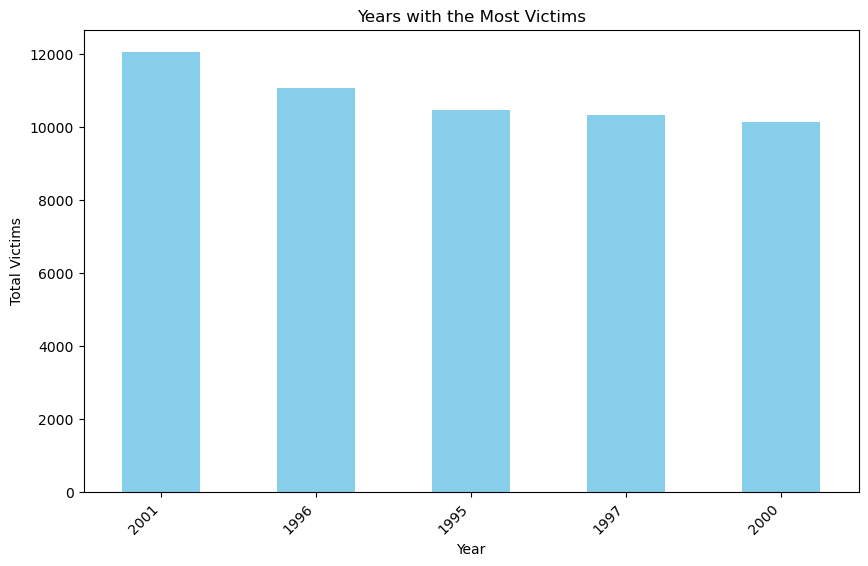

In [37]:
yearly_victims = df.groupby('DATA_YEAR')['VICTIM_COUNT'].sum()

# Sort players by hits
yearly_victims_sorted = yearly_victims.sort_values(ascending=False)

top_years = yearly_victims_sorted.head(5)

# Plot bar chart
plt.figure(figsize=(10, 6))
top_years.plot(kind='bar', color='skyblue')
plt.title('Years with the Most Victims')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.xticks(rotation=45, ha='right')
plt.show()

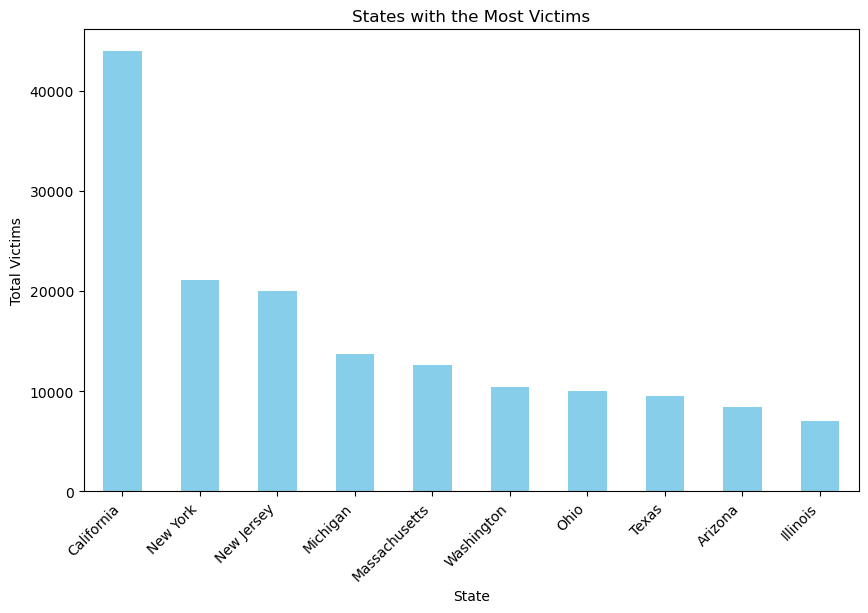

In [40]:
state_victims = df.groupby('STATE_NAME')['VICTIM_COUNT'].sum()

# Sort players by hits
state_victims_sorted = state_victims.sort_values(ascending=False)

top_states = state_victims_sorted.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue')
plt.title('States with the Most Victims')
plt.xlabel('State')
plt.ylabel('Total Victims')
plt.xticks(rotation=45, ha='right')
plt.show()

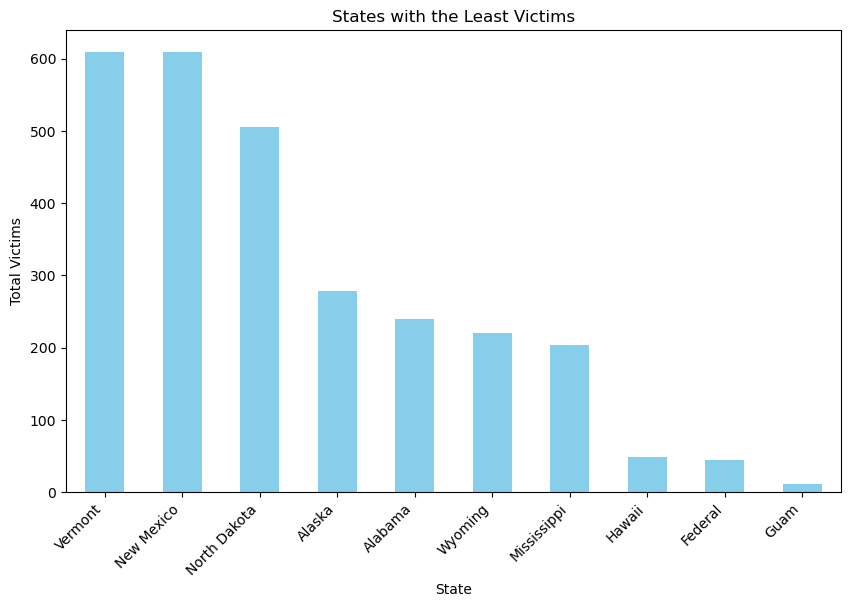

In [44]:
state_victims = df.groupby('STATE_NAME')['VICTIM_COUNT'].sum()

# Sort players by hits
state_victims_sorted = state_victims.sort_values(ascending=False)

top_states = state_victims_sorted.tail(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue')
plt.title('States with the Least Victims')
plt.xlabel('State')
plt.ylabel('Total Victims')
plt.xticks(rotation=45, ha='right')
plt.show()

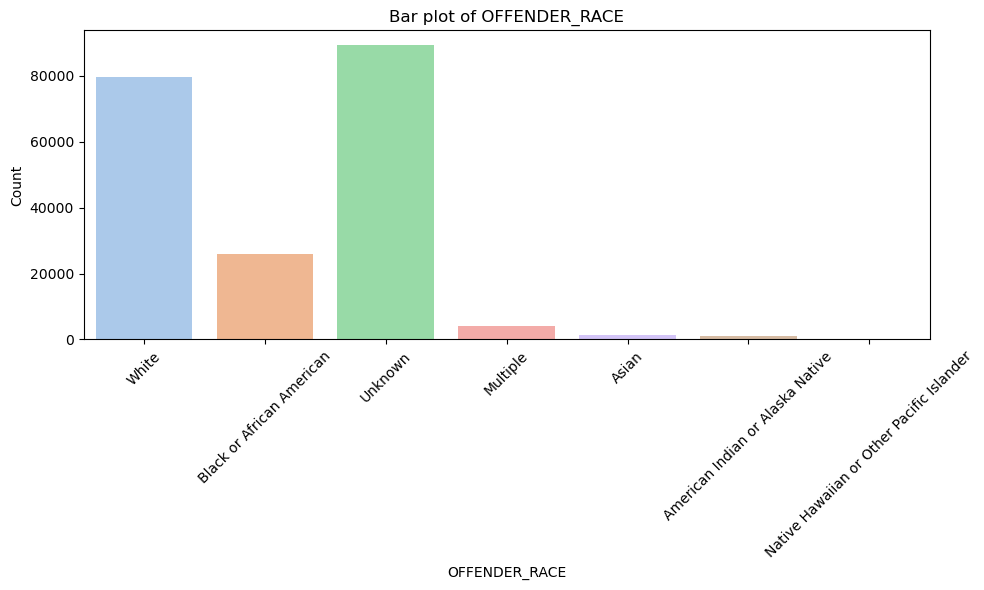

In [45]:

# Select the column you want to plot
column_to_plot = 'OFFENDER_RACE' 

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=column_to_plot, palette='pastel')
plt.title(f'Bar plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
